In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/19452/Downloads/Air_line_Delay_Cause.csv")

# Display basic info and check for missing values
print(df.info())
print(df.isnull().sum())


C:\Users\19452\AppData\Local\Temp\ipykernel_11768\3793195535.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/19452/Downloads/Air_line_Delay_Cause.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   year                 45585 non-null    float64
 1   month                45585 non-null    float64
 2   carrier              45585 non-null    object 
 3   carrier_name         45585 non-null    object 
 4   airport              45585 non-null    object 
 5   airport_name         45585 non-null    object 
 6   arr_flights          45521 non-null    float64
 7   arr_del15            45498 non-null    float64
 8   carrier_ct           45521 non-null    float64
 9   weather_ct           45521 non-null    float64
 10  nas_ct               45521 non-null    float64
 11  security_ct          45521 non-null    float64
 12  late_aircraft_ct     45521 non-null    float64
 13  arr_cancelled        45521 non-null    float64
 14  arr_diverted         45521 non-null    float64
 15

In [3]:
# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()
df['carrier'] = label_encoder.fit_transform(df['carrier'])
df['airport'] = label_encoder.fit_transform(df['airport'])

# Fill missing values (if any) with zero or mean (depending on the feature)
df.fillna(0, inplace=True)

# Feature engineering: Extract additional information if needed (like seasonality)
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] 
                                 else 'Spring' if x in [3, 4, 5] 
                                 else 'Summer' if x in [6, 7, 8] 
                                 else 'Fall')
df['season'] = label_encoder.fit_transform(df['season'])


In [4]:
# Define features (X) and target (y)
features = ['arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled']
X = df[features]
y = df['season']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:


# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation Metrics

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.971685382542975
Confusion Matrix (Random Forest):
[[201475    508    365    391]
 [   654    641    502    504]
 [   557    501    840    472]
 [   550    479    455    821]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    202739
           1       0.30      0.28      0.29      2301
           2       0.39      0.35      0.37      2370
           3       0.38      0.36      0.37      2305

    accuracy                           0.97    209715
   macro avg       0.51      0.50      0.50    209715
weighted avg       0.97      0.97      0.97    209715



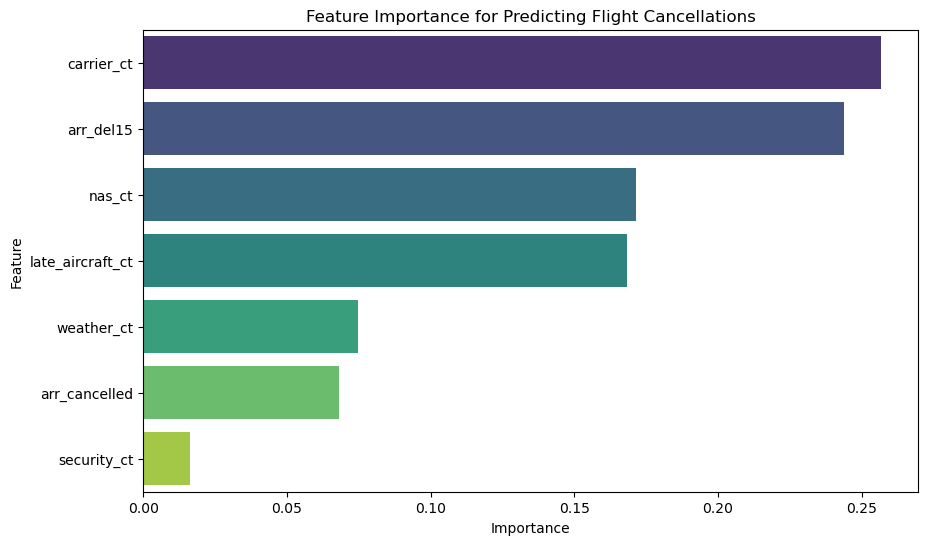

In [6]:
# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance for Predicting Flight Cancellations")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


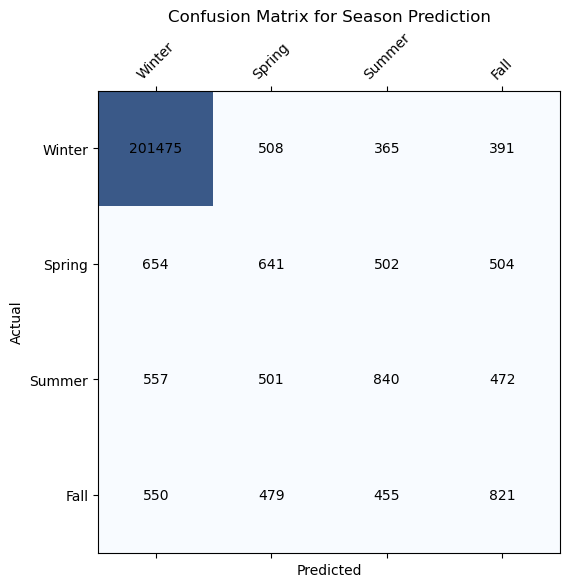

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
labels = ['Winter', 'Spring', 'Summer', 'Fall']

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.8)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.title("Confusion Matrix for Season Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels)
plt.show()



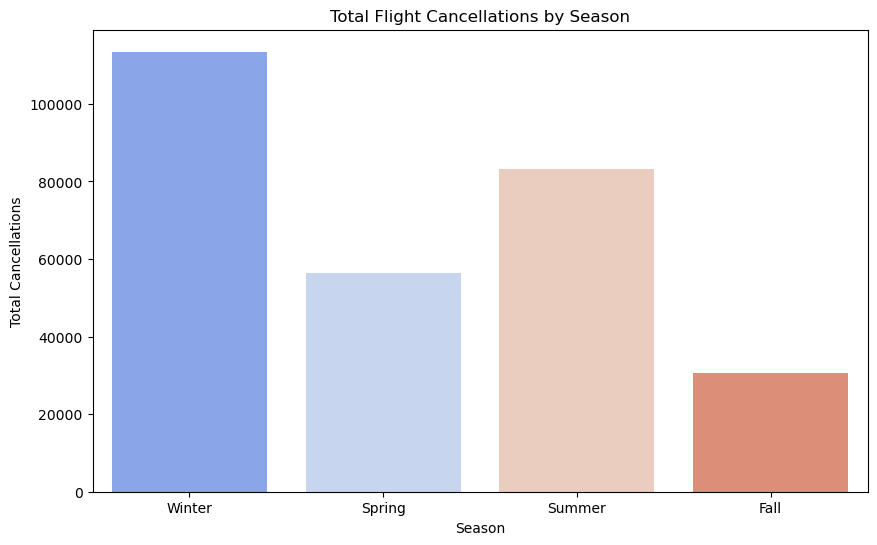

In [11]:
# Map months to seasons
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df['season'] = df['month'].map(season_mapping)

# Group by season and calculate the total/average cancellations
seasonal_cancellations = df.groupby('season')['arr_cancelled'].sum().reset_index()

# Ensure correct ordering of seasons
seasonal_cancellations['season'] = pd.Categorical(seasonal_cancellations['season'], 
                                                  categories=['Winter', 'Spring', 'Summer', 'Fall'], 
                                                  ordered=True)
seasonal_cancellations = seasonal_cancellations.sort_values('season')

# Plot the corrected seasonal cancellations
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='arr_cancelled', data=seasonal_cancellations, palette='coolwarm')
plt.title("Total Flight Cancellations by Season")
plt.xlabel("Season")
plt.ylabel("Total Cancellations")
plt.show()


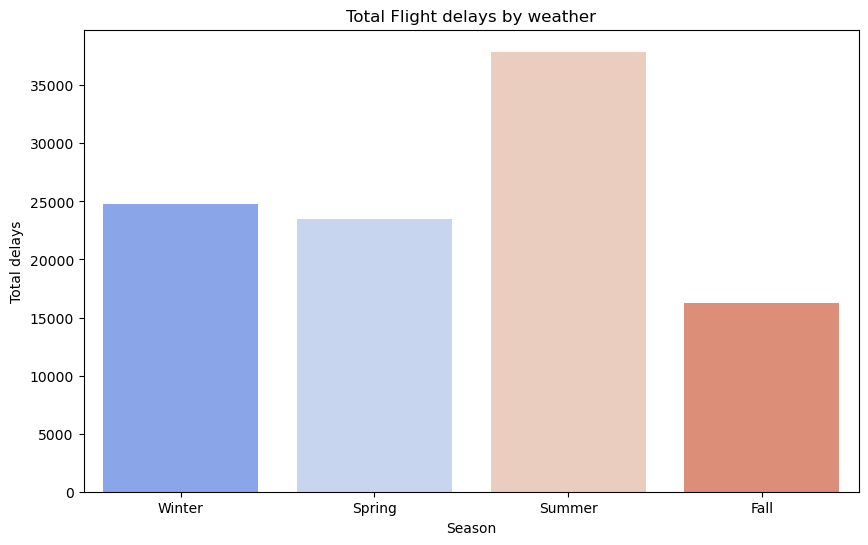

In [14]:

# Group by season and calculate the total/average cancellations
seasonal_cancellations = df.groupby('season')['weather_ct'].sum().reset_index()

# Ensure correct ordering of seasons
seasonal_cancellations['season'] = pd.Categorical(seasonal_cancellations['season'], 
                                                  categories=['Winter', 'Spring', 'Summer', 'Fall'], 
                                                  ordered=True)
seasonal_cancellations = seasonal_cancellations.sort_values('season')

# Plot the corrected seasonal cancellations
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='weather_ct', data=seasonal_cancellations, palette='coolwarm')
plt.title("Total Flight delays by weather")
plt.xlabel("Season")
plt.ylabel("Total delays")
plt.show()

